<a href="https://colab.research.google.com/github/Sandip890/DWM/blob/main/Clustering_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from pandas import DataFrame

In [2]:
X, Y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=20)

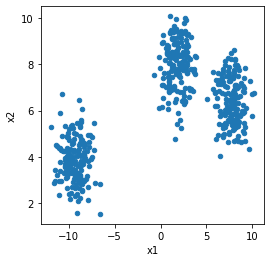

In [3]:
df = DataFrame(dict(x=X[:,0], y =X[:, 1]))
fig, ax = plt.subplots(figsize=(4,4))
df.plot(ax=ax, kind='scatter', x='x', y='y')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
def init_centroid(k,X):
  arr = []
  for i in range(k):
    cx1 = np.random.uniform(min(X[:, 0]), max(X[:,0]))
    cx2 = np.random.uniform(min(X[:, 0]), max(X[:, 0]))
    arr.append([cx1, cx2])

  return np.asarray(arr)

In [5]:
def dist(a,b):
  return np.sqrt(sum(np.square(a-b)))

def assign_cluster(k, X, cg):
  cluster = [-1] * len(X)
  for i in range(len(X)):
    dist_arr = []
    for j in range(k):
      dist_arr.append(dist(X[i], cg[j]))
    idx= np.argmin(dist_arr)
    cluster[i] = idx
  return np.asarray(cluster)

def compute_centroids(k,X,cluster):
  cg_arr = []
  for i in range(k):
    arr = [ ]
    for j in range(len(X)):
      if cluster[j] == i:
        arr.append(X[j])
    cg_arr.append(np.mean(arr, axis=0))
  return np.asarray(cg_arr)


def measure_change(cg_prev, cg_new):
  res = 0
  for a, b in zip(cg_prev, cg_new):
    res += dist(a,b)
    print(res)
  return res

def show_clusters(X, cluster, cg):
  df = DataFrame(dict(x=X[:, 0], y=X[:,1], label=cluster))
  colors = {0:'blue',1:'orange',2:'green'}
  fig, ax = plt.subplots(figsize=(4,4))
  grouped = df.groupby('label')
  for key,group in grouped:
    group.plot(ax=ax,kind='scatter', x='x', y='y', label=key,color=colors[key])
  ax.scatter(cg[:, 0], cg[:, 1], marker="*", s=150,c='#ff2222')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()


def k_means(k, X):
  cg_prev = init_centroid(k,X)
  cluster = [0] * len(X)
  cg_change = 100
  while cg_change > .001:
    cluster = assign_cluster(k,X,cg_prev)
    show_clusters(X, cluster, cg_prev)
    cg_new = compute_centroids(k, X, cluster)
    cg_change = measure_change(cg_new, cg_prev)
    cg_prev = cg_new
  return cluster

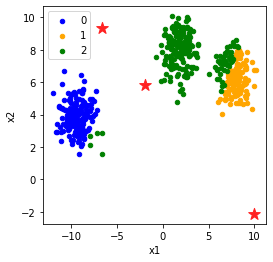

6.119824012518299
14.545145952223987
19.512345727847766


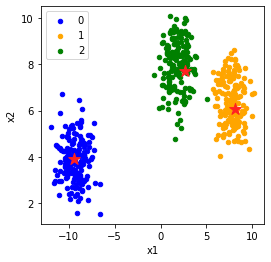

0.08027655507788219
0.5343819046714787
1.3924425175942732


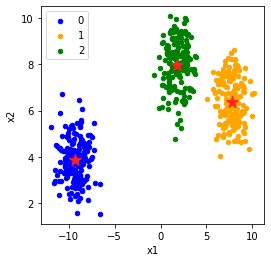

0.0
0.0161503151276354
0.037463218794949


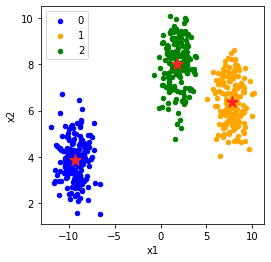

0.0
0.0
0.0


In [6]:
cluster = k_means(3,X)